In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
sns.set()

In [3]:
from sklearn.cluster import KMeans

In [4]:
CData=pd.read_csv('Countries.csv')

In [5]:
CData.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [6]:
CData.shape

(241, 3)

In [7]:
CData.dtypes

name          object
Longitude    float64
Latitude     float64
dtype: object

In [8]:
CData['Longitude'].describe()

count    241.000000
mean      14.215380
std       72.013654
min     -177.348348
25%      -36.433184
50%       18.644925
75%       47.587005
max      171.484924
Name: Longitude, dtype: float64

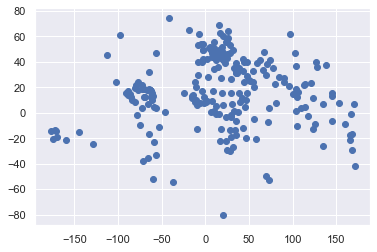

In [9]:
plt.scatter(CData['Longitude'],CData['Latitude'])

In [12]:
#Selecting the features
NCData=CData.iloc[:,1:3,]

In [13]:
NCData

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [14]:
kmeans=KMeans(2)

In [15]:
kmeans.fit(NCData)

KMeans(n_clusters=2)

In [16]:
identified_clusters = kmeans.fit_predict(NCData)

In [17]:
identified_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [18]:
len(identified_clusters)

241

In [19]:
country_cluster=CData.copy()

In [20]:
country_cluster

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [21]:
country_cluster["Cluster No"]= identified_clusters

In [22]:
country_cluster

,name,Longitude,Latitude,Cluster No
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


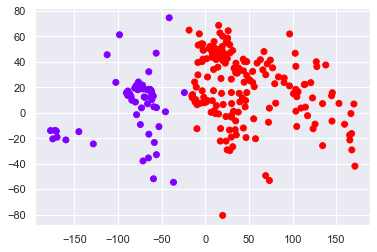

In [23]:
plt.scatter(country_cluster["Longitude"],country_cluster["Latitude"],c=country_cluster["Cluster No"],cmap="rainbow")

In [24]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(NCData)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

G:\Softwares\Anaconda\install\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
wcss

[1413859.6798344278,
 657012.0797586322,
 325235.522370559,
 256573.08675934304,
 192194.98290025242,
 152244.93717281363,
 127277.58292003977,
 103719.8138240018,
 85043.05667922426,
 76439.4964481882]

Text(0, 0.5, 'Within-cluster Sum of Squares')

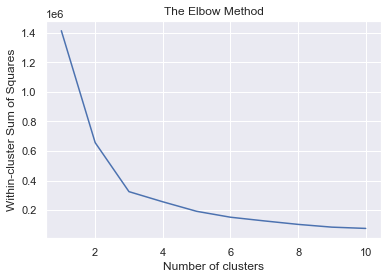

In [26]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')


In [27]:
kmeans1 = KMeans(3)
kmeans1.fit(NCData)

KMeans(n_clusters=3)

In [28]:
identified_clusters1 = kmeans1.fit_predict(NCData)

In [29]:
identified_clusters1

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

In [30]:
country_cluster1=CData.copy()

In [31]:
country_cluster1.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
